In [12]:
import pickle

import matplotlib.pyplot as plt
import tensorflow as tf

import utils

In [13]:
with open("output/mit_b0_0/model.pkl", "rb") as f:
    model = pickle.load(f)
image = utils.load_image("data/test_split/paper_0.jpg", backbone="mit_b0")

/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/task.py:43: UserWa

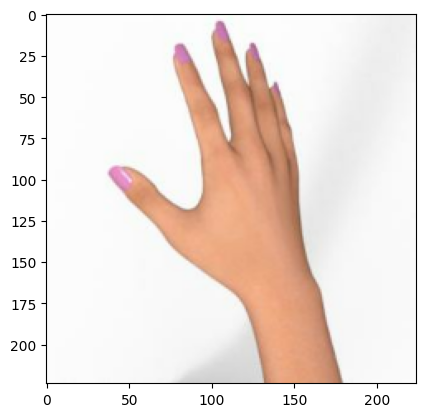

In [14]:
plt.imshow(tf.cast(image[0], tf.uint8))

In [15]:
image_adv, pertubations = model.generate_adv_image(image, labels=[1], epsilon=0.2, return_pertubations=True)

2024-01-16 21:25:27.270067: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-16 21:25:27.906399: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


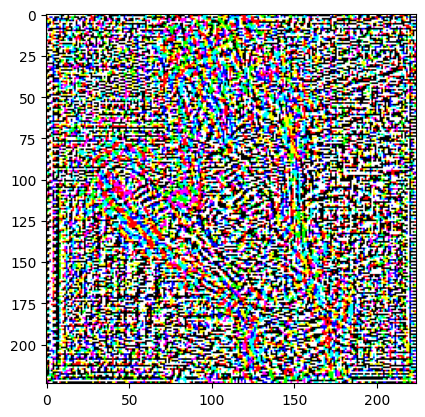

In [6]:
plt.imshow(0.5*pertubations[0]+0.5)

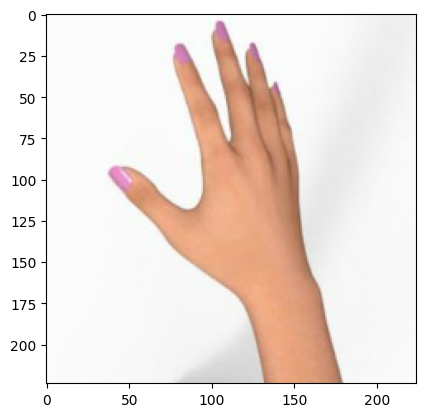

In [7]:
plt.imshow(tf.cast(image_adv[0], tf.uint8))